In [17]:
# import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# define the URL of the CSV file
url = "https://raw.githubusercontent.com/tatejones2/MLB_Data_10-1-25/main/MLB-data-oct1-2025.csv"

# read the CSV file from the URL
response = requests.get(url)
if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text))
else:
    print(f"Error: {response.status_code} - Unable to fetch data")

# display first 5 rows
df.head()

Matplotlib is building the font cache; this may take a moment.


,Rk,Player,Age,Team,Lg,WAR,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/BB,Awards
0,1,Logan Webb,28,SFG,NL,3.9,15,11,0.577,3.22,34,34,0,0,0,0,207.0,210,82,74,14,46,0,224,6,0,2,856,124.0,2.60,1.237,9.1,0.6,2.0,9.7,4.87,AS
1,2,Garrett Crochet*,26,BOS,AL,6.3,18,5,0.783,2.59,32,32,0,1,1,0,205.1,165,62,59,24,46,0,255,3,3,7,814,159.0,2.89,1.028,7.2,1.1,2.0,11.2,5.54,AS
2,3,Cristopher Sánchez*,28,PHI,NL,8.0,13,5,0.722,2.50,32,32,0,1,0,0,202.0,171,58,56,12,44,0,212,6,1,6,807,176.0,2.55,1.064,7.6,0.5,2.0,9.4,4.82,NaN
3,4,Max Fried*,31,NYY,AL,4.5,19,5,0.792,2.86,32,32,0,0,0,0,195.1,164,73,62,14,51,0,189,10,1,8,801,142.0,3.07,1.101,7.6,0.6,2.3,8.7,3.71,AS
4,5,Carlos Rodón*,32,NYY,AL,4.6,18,9,0.667,3.09,33,33,0,0,0,0,195.1,132,74,67,22,73,0,203,9,0,4,789,132.0,3.78,1.049,6.1,1.0,3.4,9.4,2.78,AS


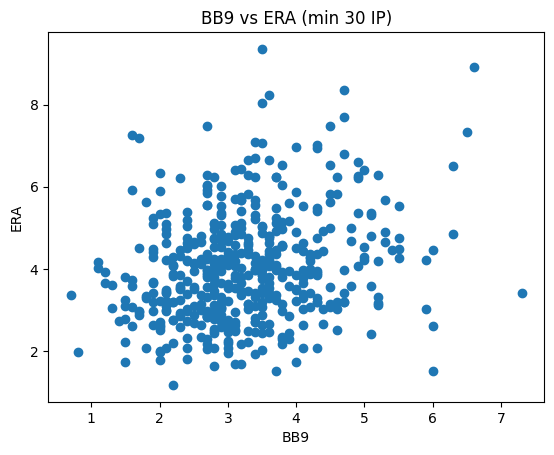

In [ ]:
# Filter for players with at least 30 innings
filtered_df = df[df['IP'] >= 30]

# Build your lists
player_list = filtered_df['Player'].tolist()
bb9_list = filtered_df['BB9'].tolist()
era_list = filtered_df['ERA'].tolist()

# Plot
plt.scatter(bb9_list, era_list)
plt.xlabel('BB9')
plt.ylabel('ERA')
plt.title('BB9 vs ERA (min 30 IP)')
plt.show()



Text(0.5, 1.0, 'Top 20 Pitchers by ERA (>=30 IP) — Strikeouts')

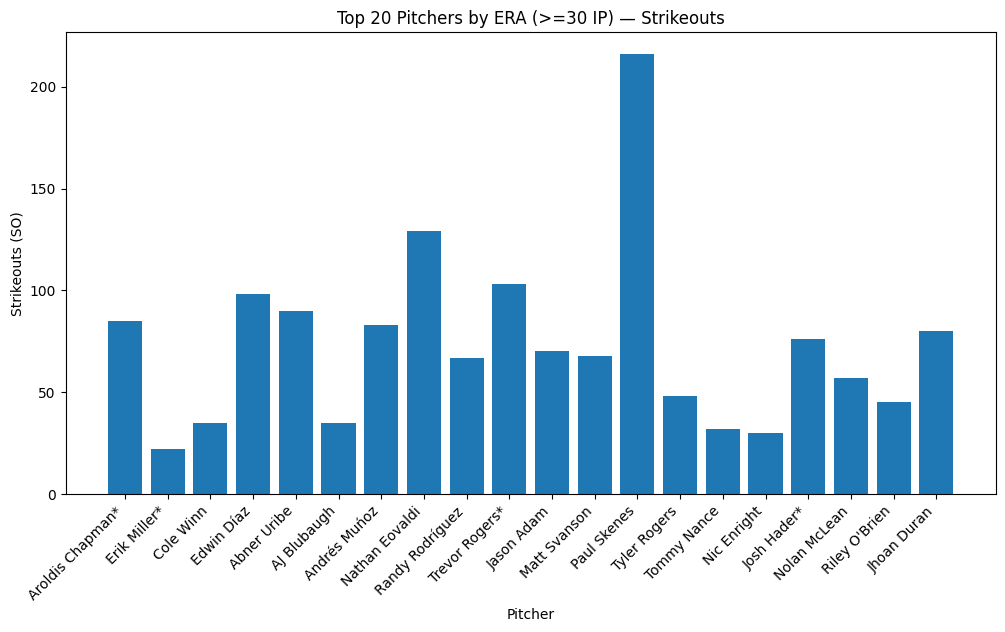

In [ ]:
top20ERA = filtered_df.sort_values(by='ERA').head(20)

# Step 3: make bar chart of strikeouts
plt.figure(figsize=(12,6))
plt.bar(top20ERA['Player'], top20ERA['SO'])

# Step 4: formatting
plt.xticks(rotation=45, ha='right')  # rotate names so they don’t overlap
plt.xlabel('Pitcher')
plt.ylabel('Strikeouts (SO)')
plt.title('Top 20 Pitchers by ERA (>=30 IP) — Strikeouts')

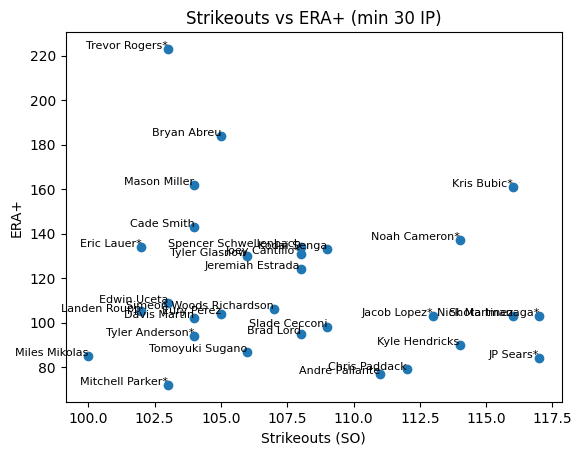

In [31]:
filtered_df_K = filtered_df[filtered_df['SO'] >= 100]
top30K = filtered_df_K.sort_values(by='SO').head(30)

# Show names
for i, player in enumerate(top30K['Player']):
    plt.text(top30K['SO'].iloc[i], top30K['ERA+'].iloc[i], player, fontsize=8, ha='right')

plt.scatter(top30K['SO'], top30K['ERA+'])
plt.xlabel('Strikeouts (SO)')
plt.ylabel('ERA+')
plt.title('Strikeouts vs ERA+ (min 30 IP)')
plt.show()

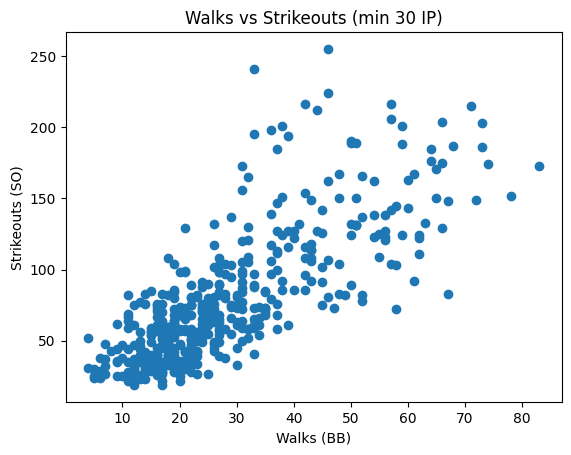

In [32]:
walk_list = filtered_df['BB'].tolist()
k_list = filtered_df['SO'].tolist()

plt.scatter(walk_list, k_list)
plt.xlabel('Walks (BB)')
plt.ylabel('Strikeouts (SO)')
plt.title('Walks vs Strikeouts (min 30 IP)')
plt.show()

In [34]:
best_whip = filtered_df.sort_values(by='WHIP').head(20)

print(best_whip[['Player', 'WHIP', 'ERA', 'SO', 'BB']])

               Player   WHIP   ERA   SO  BB
269  Aroldis Chapman*  0.701  1.17   85  15
175   Shawn Armstrong  0.811  2.31   74  20
309     Taylor Clarke  0.849  3.25   44   9
93     Nathan Eovaldi  0.854  1.73  129  21
324       Josh Hader*  0.854  2.05   76  16
197    Dennis Santana  0.867  2.18   60  17
264      Gabe Speier*  0.871  2.61   82  11
226        Edwin Díaz  0.874  1.63   98  21
456       AJ Blubaugh  0.875  1.69   35  11
281      Matt Svanson  0.878  1.94   68  20
294   Caleb Thielbar*  0.879  2.64   56  13
333   Randy Rodríguez  0.888  1.78   67  11
5       Tarik Skubal*  0.891  2.21  241  33
191     Steven Okert*  0.893  3.01   84  19
176   Adrián Morejón*  0.896  2.08   70  17
118    Trevor Rogers*  0.903  1.81  103  29
203     Robert Suarez  0.904  2.97   75  16
268      Mason Miller  0.908  2.63  104  28
244  Brandon Woodruff  0.912  3.20   83  14
205      Emilio Pagán  0.917  2.88   81  22
